# Movie Genre Data Analysis

### Introduction
We are going to look at movie data with a focus on genre.
Here are some things we plan to look at:

### Research Questions (Q):
1. Which genres are the most common (number of movies made)?
2. Which genres have high avg. budget and revenue?
3. Which genres have high avg. popularity?
4. Which genres have highest number of movies with a voting avg. >=8?
    
### Research Hypotheses (H):
1. The best movies according to vote avg. return high profit and revenue.
2. The best movies according to popularity return high revenue.
3. Highly budgeted movies return high profit.
4. Highly budgeted movies have a high popularity.

### Bonus:
1. Look at Profit Per Genre Per Year


In [127]:
import pandas as pd

In [136]:
movies = pd.read_csv(r"C:\Mac\Home\Documents\Projects\Resources\imdb_movies.csv")

In [13]:
movies.drop_duplicates(inplace=True)

In [14]:
movies.dropna(subset=['genres'], inplace=True)

In [15]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10842 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10842 non-null  int64  
 1   imdb_id               10834 non-null  object 
 2   popularity            10842 non-null  float64
 3   budget                10842 non-null  int64  
 4   revenue               10842 non-null  int64  
 5   original_title        10842 non-null  object 
 6   cast                  10767 non-null  object 
 7   homepage              2931 non-null   object 
 8   director              10800 non-null  object 
 9   tagline               8036 non-null   object 
 10  keywords              9367 non-null   object 
 11  overview              10839 non-null  object 
 12  runtime               10842 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9826 non-null   object 
 15  release_date          10

In [16]:
movies['profit'] = movies['revenue'] - movies['budget']

In [189]:
#keeping only the needed columns
movies_genre = movies[['popularity','budget','revenue','original_title','runtime','genres','release_year','vote_count','vote_average','profit']]

In [39]:
from pandas import Series, DataFrame

In [190]:
#split the diffrent genres for each movies. drop the index level to flatten the data. delete the old genres column and add the genres_split column
split = movies_genre['genres'].str.split('|').apply(Series,1).stack()
split.index = split.index.droplevel(-1)
split.name = 'genres_split'
del movies_genre['genres']
movies_genre = movies_genre.join(split)

C:\Users\rossgottschalk\AppData\Local\Temp\ipykernel_9624\3656814029.py:2: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split = movies_genre['genres'].str.split('|').apply(Series,1).stack()


#
#

### Research Questions (Q):
1. Which genres are the most common (number of movies made)?

In [50]:
genres_count = pd.DataFrame(movies_genre.groupby('genres_split').original_title.nunique()).sort_values('original_title', ascending = True)

<Axes: title={'center': 'Movies per Genre in %'}, ylabel='original_title'>

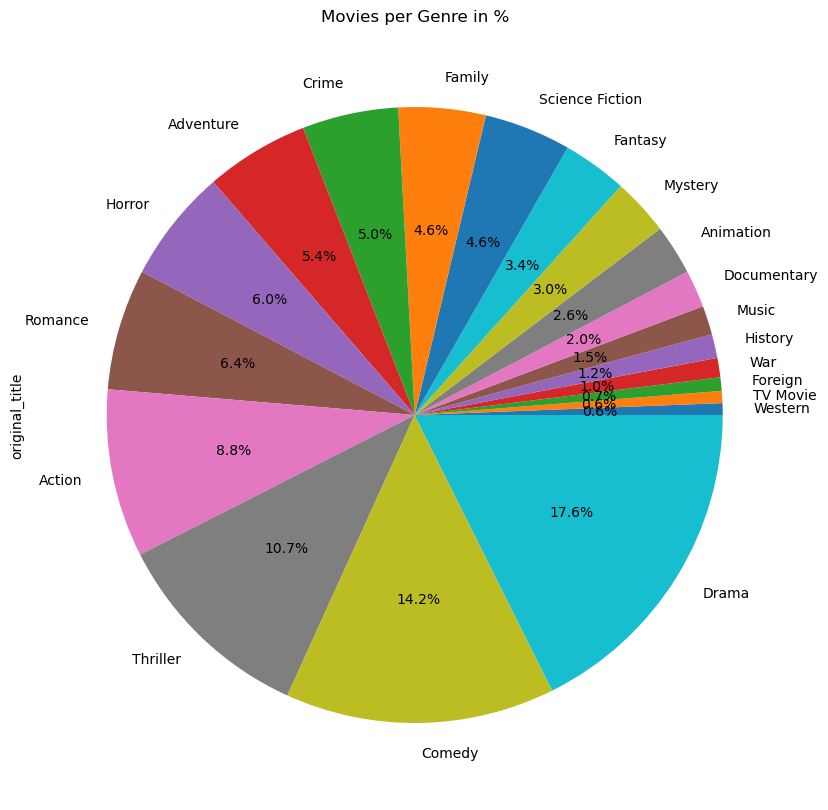

In [98]:
genres_count['original_title'].plot.pie(title='Movies per Genre in %', autopct='%1.1f%%',figsize = (10,10))

<Axes: title={'center': 'Movies per Genre'}, ylabel='genres_split'>

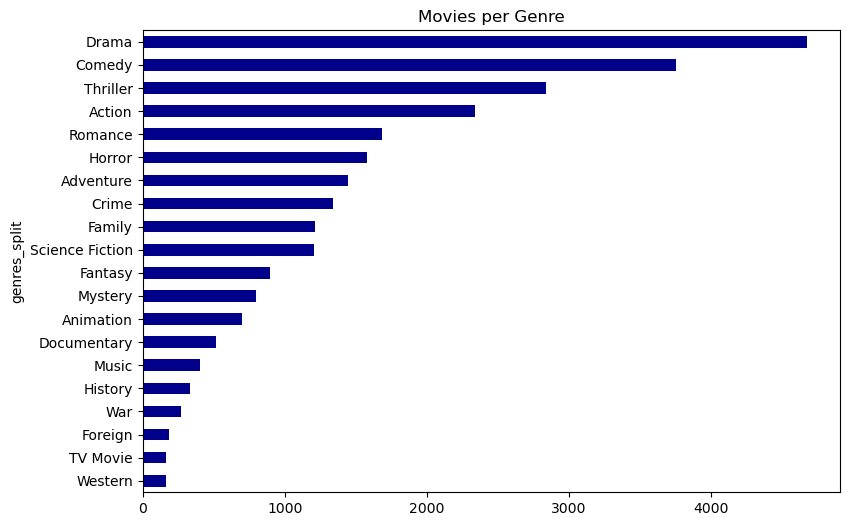

In [62]:
genres_count['original_title'].plot.barh(title= 'Movies per Genre', color='darkblue',figsize = (9,6))

#
#

### Research Questions (Q):
2. Which genres have high avg. budget and revenue?

In [84]:
genres_avg = pd.DataFrame(movies_genre.groupby('genres_split').mean(numeric_only=True))
pd.options.display.float_format = '{:2f}'.format

In [94]:
genres_avg.sort_values('revenue',ascending=True,inplace=True)

<Axes: title={'center': 'Budget and Revenue by Genre'}, ylabel='genres_split'>

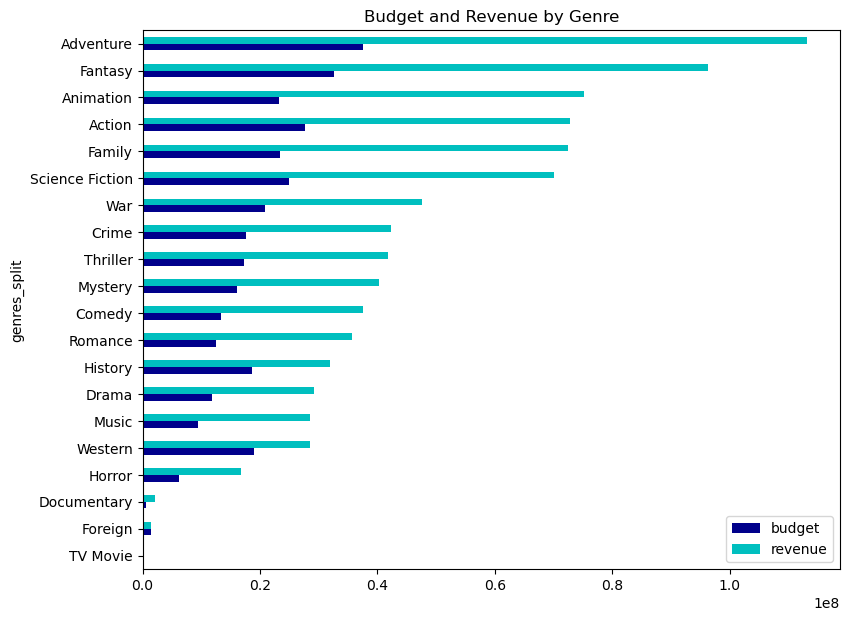

In [95]:
genres_avg[['budget','revenue']].plot.barh(title = 'Budget and Revenue by Genre', color = ('DarkBlue','c'),figsize = (9,7))

#
#

## Research Questions (Q):
3. Which genres have high avg. popularity?

In [102]:
genres_avg.sort_values('popularity',ascending=True,inplace=True)

<Axes: title={'center': 'Popularity by Genre'}, ylabel='genres_split'>

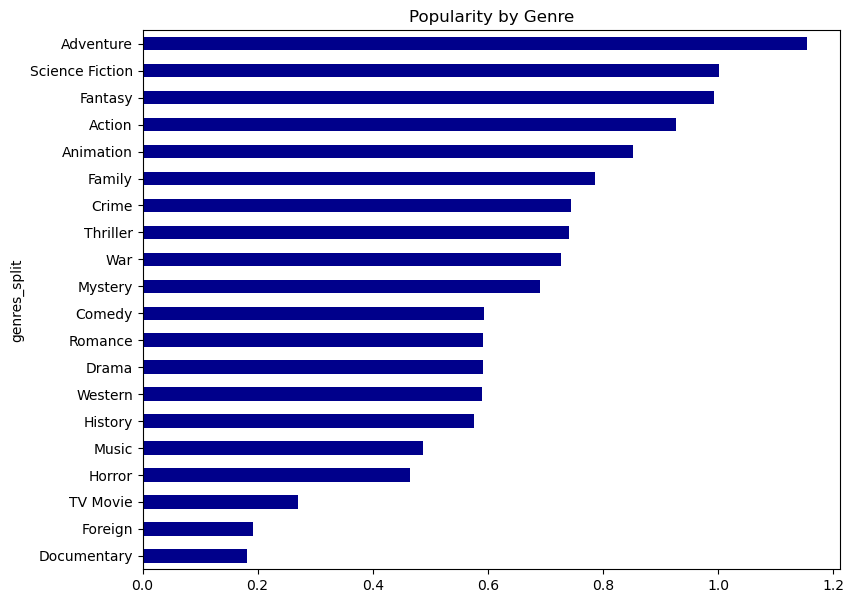

In [103]:
genres_avg['popularity'].plot.barh(title ='Popularity by Genre', color=('DarkBlue'),figsize = (9,7))

#
#

### Research Questions (Q):

4. Which genres have highest number of movies with a voting avg. >=8?

In [132]:
vote_fifty = movies_genre[(movies_genre['vote_count']>=50) & (movies_genre['vote_average']>=8)]

In [129]:
genres_vote = pd.DataFrame(vote_fifty.groupby('genres_split').vote_average.nunique()).sort_values('vote_average', ascending = True)

<Axes: title={'center': '# of Movies With Average Vote >=8 by Genre'}, ylabel='genres_split'>

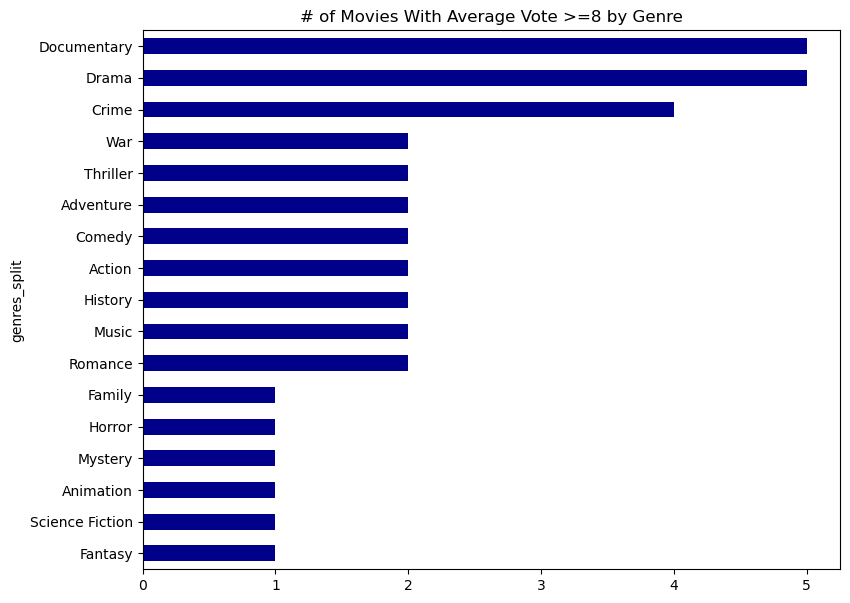

In [134]:
genres_vote['vote_average'].plot.barh(title ='# of Movies With Average Vote >=8 by Genre', color=('DarkBlue'),figsize = (9,7))

#
#

### Research Hypotheses (H):
1. The best movies according to vote avg. return high profit and revenue.

In [144]:
movies.drop_duplicates(inplace=True)
movies['profit'] = movies['revenue'] - movies['budget']
movies_genre = movies[['popularity','budget','revenue','original_title','runtime','genres','release_date','vote_count','vote_average','profit']]

In [146]:
movies_vmin = movies_genre[movies_genre['vote_count']>=50]
movies_vmin.corr(method = 'spearman',numeric_only = True)

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.485149,0.588739,0.230518,0.768966,0.188670,0.498117
budget,0.485149,1.000000,0.714828,0.360230,0.554586,-0.044440,0.334390
revenue,0.588739,0.714828,1.000000,0.341707,0.682656,0.111731,0.842221
runtime,0.230518,0.360230,0.341707,1.000000,0.263460,0.285514,0.212060
vote_count,0.768966,0.554586,0.682656,0.263460,1.000000,0.284470,0.583602
vote_average,0.188670,-0.044440,0.111731,0.285514,0.284470,1.000000,0.198308
profit,0.498117,0.334390,0.842221,0.212060,0.583602,0.198308,1.000000


In [155]:
import seaborn as sns

<Axes: xlabel='vote_average', ylabel='revenue'>

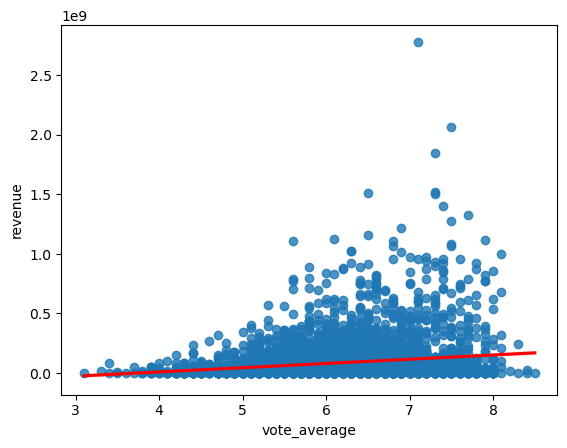

In [161]:
sns.regplot(movies_vmin, x='vote_average', y='revenue', line_kws = {'color':'red'})

### Research Hypotheses (H):
2. The best movies according to popularity return high revenue.

In [163]:
import matplotlib.pyplot as plt

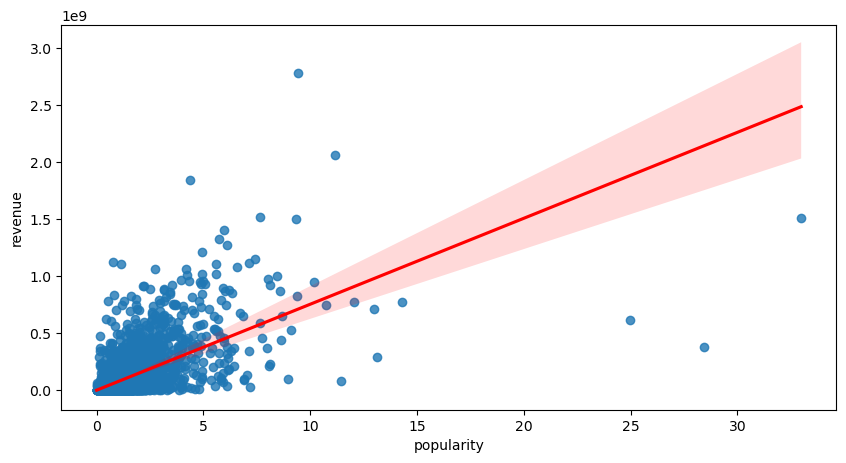

In [181]:
plt.figure(figsize=(10,5))
sns.regplot(movies_vmin, x='popularity', y='revenue', line_kws = {'color':'red'})
plt.show()

#
#

### Research Hypotheses (H):
3. Highly budgeted movies return high profit.

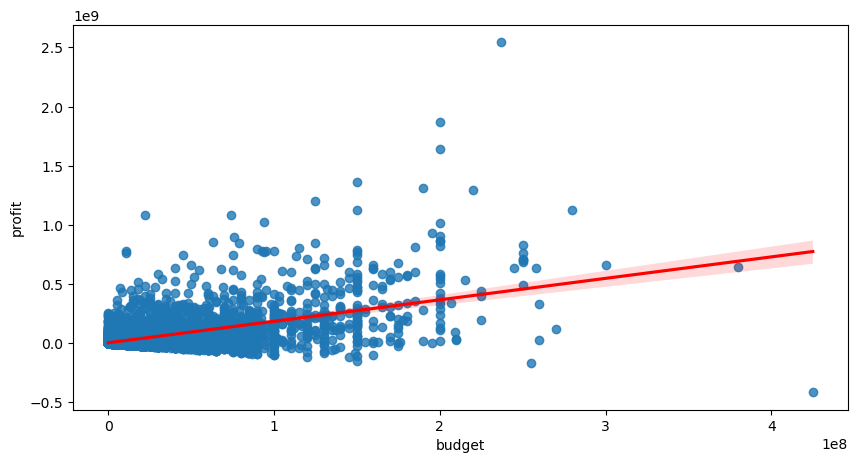

In [180]:
plt.figure(figsize=(10,5))
sns.regplot(movies_vmin, x='budget', y='profit', line_kws = {'color':'red'})
plt.show()

### Research Hypotheses (H):
4. Highly budgeted movies have a high popularity.

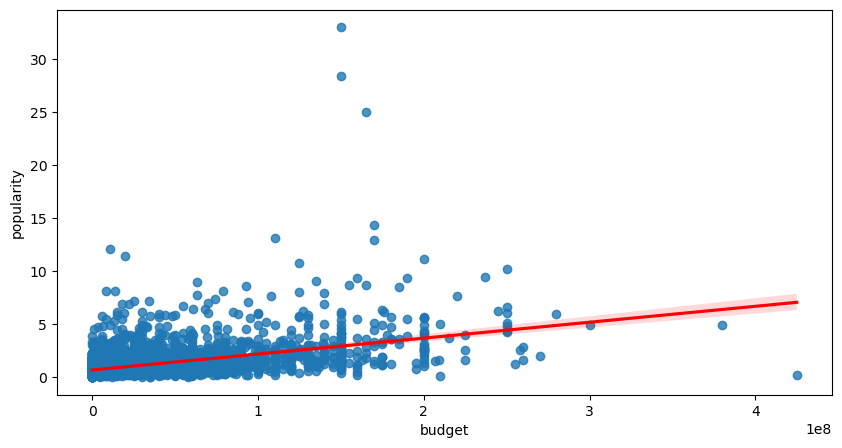

In [182]:
plt.figure(figsize=(10,5))
sns.regplot(movies_vmin, x='budget', y='popularity', line_kws = {'color':'red'})
plt.show()

#
#

### Bonus:
1. Look at Profit per Genre per Year

In [194]:
year_genre = pd.DataFrame(movies_genre.groupby(['release_year','genres_split'])['profit'].mean())

In [197]:
pivot_genre = pd.pivot_table(year_genre, values='profit',index='genres_split',columns = 'release_year')

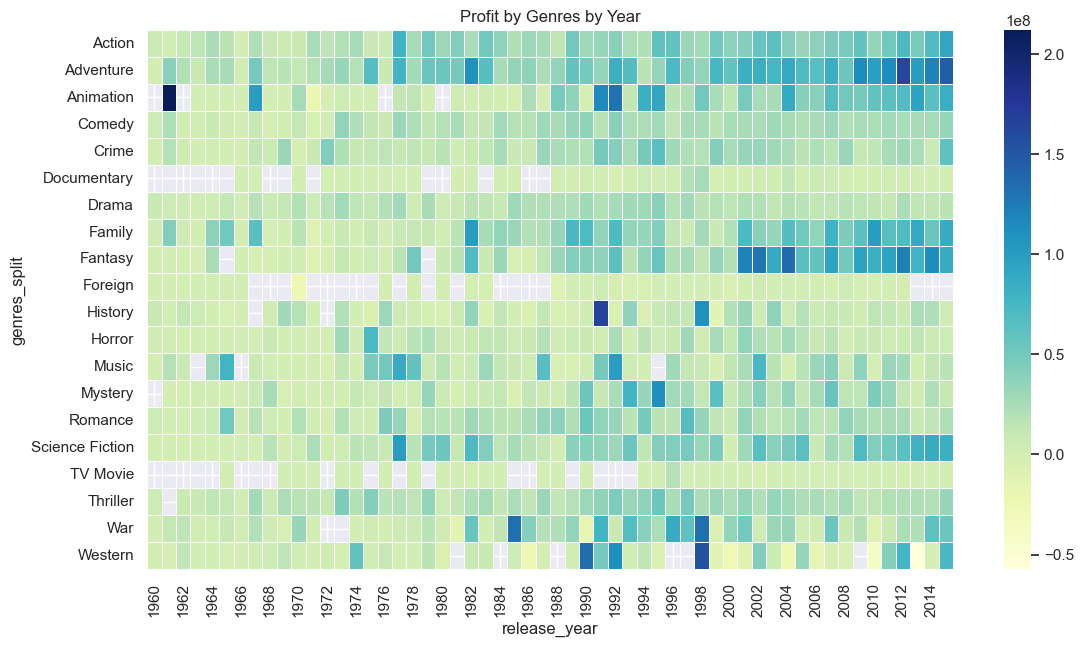

In [204]:
sns.set(rc = {'figure.figsize': (13,7)})
sns.heatmap(pivot_genre, cmap='YlGnBu',linewidths = .5)
plt.title('Profit by Genres by Year')
plt.show()